<a href="https://colab.research.google.com/github/msalmankhan03/Segmentation/blob/main/Segmentation%20using%20yolo%20v8%5Csegmentation_for_inovako_company_using_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics roboflow --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 128.4 MB/s eta 0:00:00


In [2]:
from roboflow import Roboflow

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="UVynpeaBPWtSeiT7QTXx")
project = rf.workspace("salmanworkspace").project("segmentation-for-inovako-company-wbe0b")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to Segmentation-for-Inovako-Company-1 in yolov8:: 100%|██████████| 284/284 [00:00<00:00, 9812.77it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
print("Dataset downloaded! Location:", dataset.location)


Dataset downloaded! Location: /content/Segmentation-for-Inovako-Company-1


In [6]:
from ultralytics import YOLO

# Train (adjust epochs, imgsize, batch as needed)
model = YOLO("yolov8s-seg.pt")  # starting from a small segmentation model

model.train(
    data="/content/Segmentation-for-Inovako-Company-1/data.yaml",
    epochs=50,         # try 50 (tune as needed)
    imgsz=640,
    batch=16,
    name="birds-segmentation"
)

Ultralytics 8.3.236 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Segmentation-for-Inovako-Company-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=birds-segmentation, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patienc

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7eb3e387da00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04

In [10]:
!ls /content/runs/segment/birds-segmentation


args.yaml			 MaskF1_curve.png  train_batch280.jpg
BoxF1_curve.png			 MaskP_curve.png   train_batch281.jpg
BoxP_curve.png			 MaskPR_curve.png  train_batch282.jpg
BoxPR_curve.png			 MaskR_curve.png   train_batch2.jpg
BoxR_curve.png			 results.csv	   val_batch0_labels.jpg
confusion_matrix_normalized.png  results.png	   val_batch0_pred.jpg
confusion_matrix.png		 train_batch0.jpg  weights
labels.jpg			 train_batch1.jpg


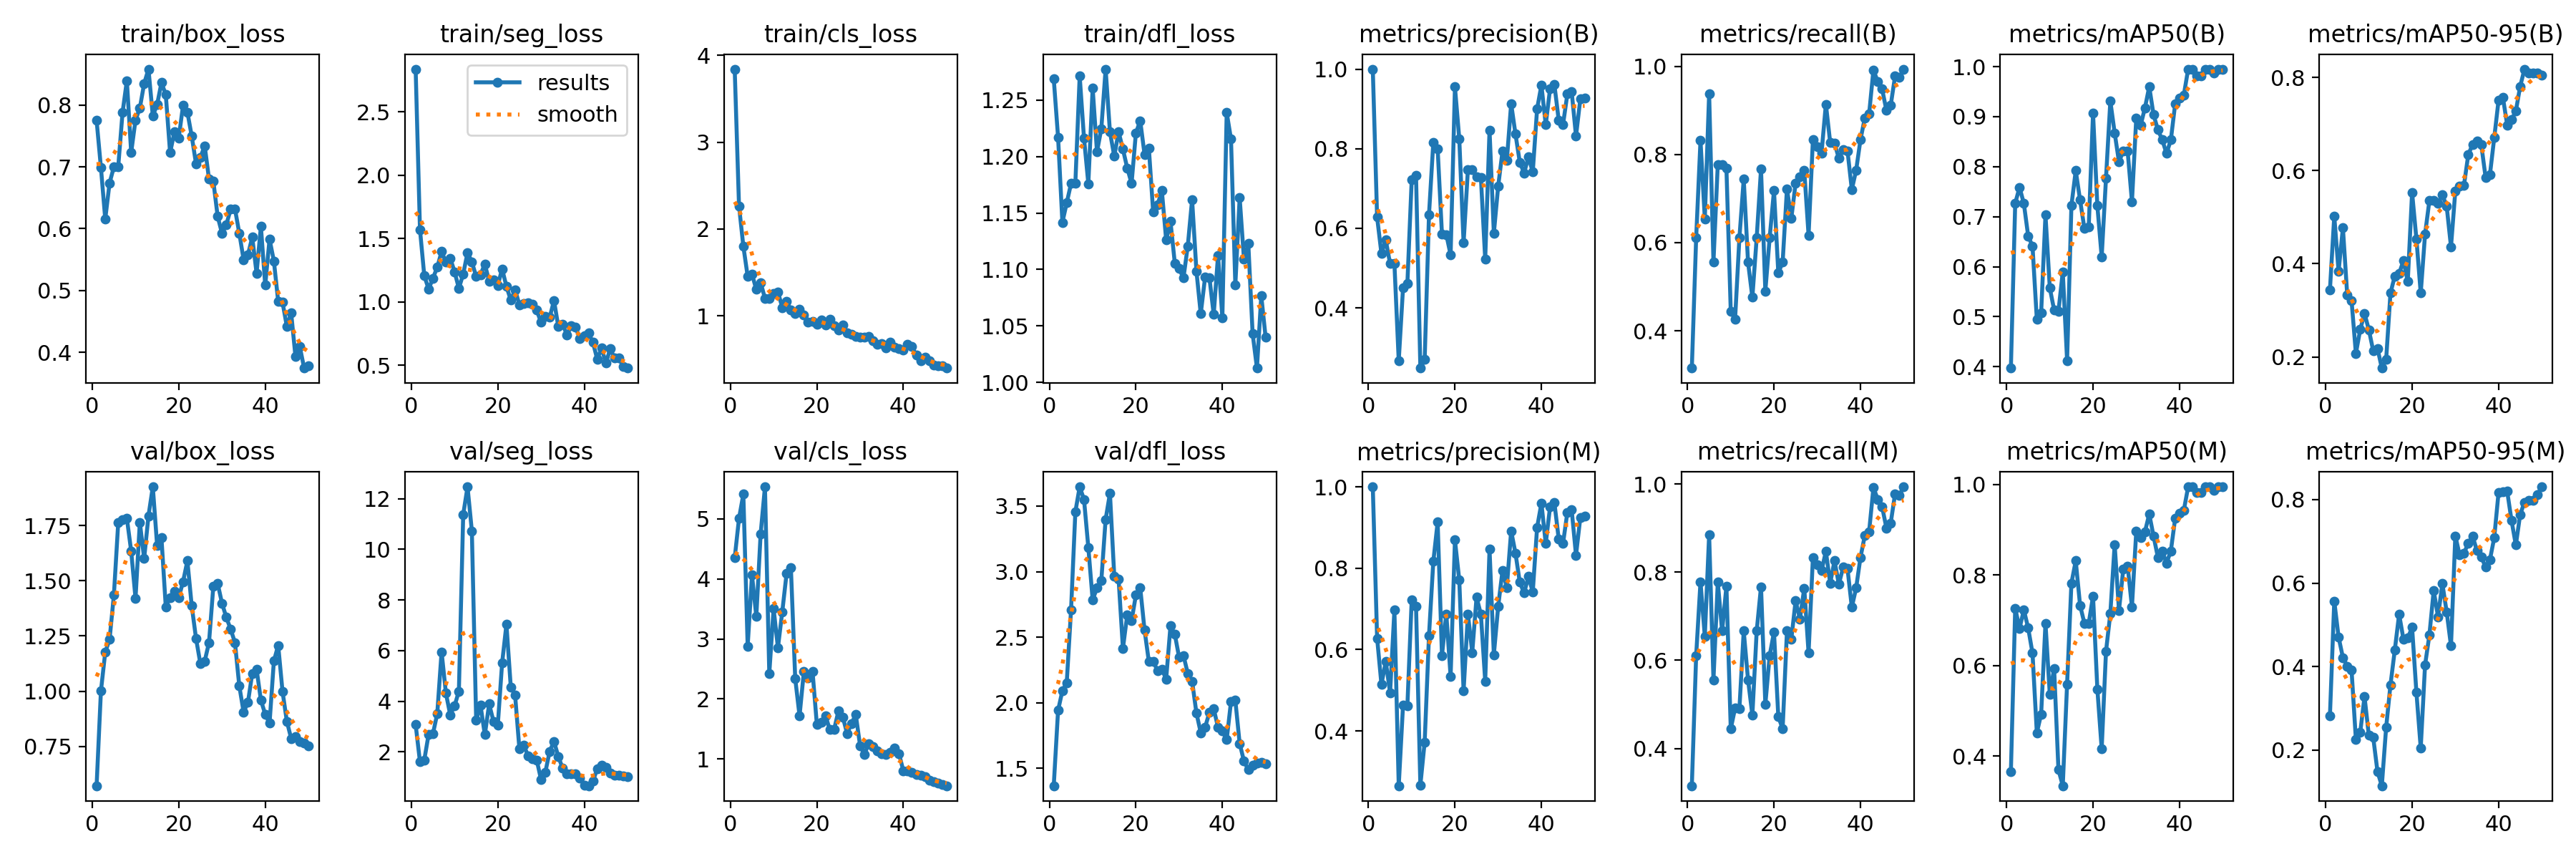

In [12]:
from IPython.display import Image, display
display(Image('/content/runs/segment/birds-segmentation/results.png'))

In [16]:
best_model = YOLO("/content/runs/segment/birds-segmentation/weights/best.pt")



image 1/16 /content/Segmentation-for-Inovako-Company-1/test/images/007_jpg.rf.5c4e99ae7dc852df561cf1eab40fbd58.jpg: 640x640 2 birds, 20.5ms
image 2/16 /content/Segmentation-for-Inovako-Company-1/test/images/103_jpg.rf.d830d7dd06fdde2da7de58cb44087624.jpg: 640x640 1 cat, 20.4ms
image 3/16 /content/Segmentation-for-Inovako-Company-1/test/images/Pigeon11_jpg.rf.6b5b4d174d3529c0161102abde547828.jpg: 640x640 1 bird, 20.4ms
image 4/16 /content/Segmentation-for-Inovako-Company-1/test/images/Pigeon25_jpg.rf.6688912bcf2be7336644c64d60f7ed43.jpg: 640x640 1 bird, 20.4ms
image 5/16 /content/Segmentation-for-Inovako-Company-1/test/images/cat-3765_jpg.rf.e4dded27c0f05dea8c81524c2f328c13.jpg: 640x640 1 cat, 20.4ms
image 6/16 /content/Segmentation-for-Inovako-Company-1/test/images/cat-4948_jpg.rf.17f4b6a9052d24fe3a1e79197feb5285.jpg: 640x640 1 cat, 20.4ms
image 7/16 /content/Segmentation-for-Inovako-Company-1/test/images/cat-4959_jpg.rf.4a4a8d93f687a0688d26bd952d251b1f.jpg: 640x640 1 cat, 1 dog, 20.4

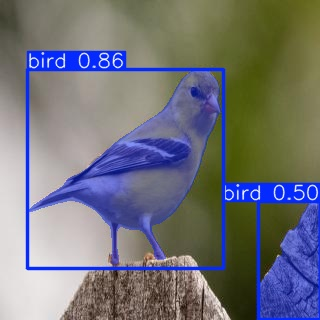

In [19]:
test_images = f"{dataset.location}/test/images"

# Run prediction on whole test folder
results = best_model.predict(
    source=test_images,
    conf=0.25,
    save=True,    # saves results to runs/segment/predict
)

print("Inference finished! Check the saved results.")

# ===================
# 6) Display Inference Outputs
# ===================
!ls /content/runs/segment/predict

# Display some results
display(Image("/content/runs/segment/predict/007_jpg.rf.5c4e99ae7dc852df561cf1eab40fbd58.jpg"))

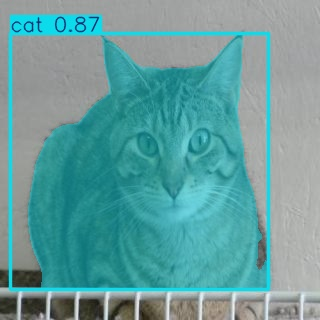

In [20]:
display(Image("/content/runs/segment/predict/103_jpg.rf.d830d7dd06fdde2da7de58cb44087624.jpg"))

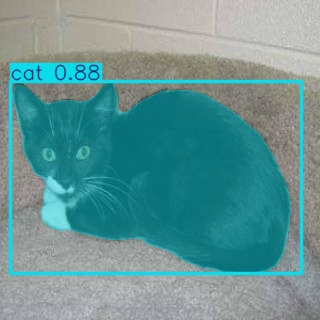

In [21]:
display(Image("/content/runs/segment/predict/cat-3765_jpg.rf.e4dded27c0f05dea8c81524c2f328c13.jpg"))